# **CS 1810 Homework 0**
---
To account for potential version issues, try the following in your terminal:

1. Create a new environment with `python3 -m venv venv`
2. Activate that environment with `source venv/bin/activate`
3. Make sure the interpreter in the top right corner of your VSCode (or whatever u use to run ur code is venv).
4. If you get a "install kernel" message, press it.
5. Run `pip install -r requirements.txt`
6. Run the remainder of this notebook.

Note that this is not necessary (especially for hw0) but can help prevent any issues due to package versions.

In [49]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal as mvn
from scipy.stats import poisson, norm

## 1.6 Implement the solution for $\mathbf{w}$.

In [9]:
x1, y1 = 1, 2
x2, y2 = 3, 6

X = np.array([[1, x1], [1, x2]])
y = np.array([y1, y2])

w = np.linalg.solve(X, y)
w0, w1 = w

print("X =\n", X)
print("y =", y.tolist())
print("w =", w.tolist())

print("check y1:", w0 + w1*x1)
print("check y2:", w0 + w1*x2)

X =
 [[1 1]
 [1 3]]
y = [2, 6]
w = [0.0, 2.0]
check y1: 2.0
check y2: 6.0


## 2.1 Plot $y = -3x^2 + 72x + 70$.

Text(0.5, 1.0, 'y = -3x^2 + 72x + 70')

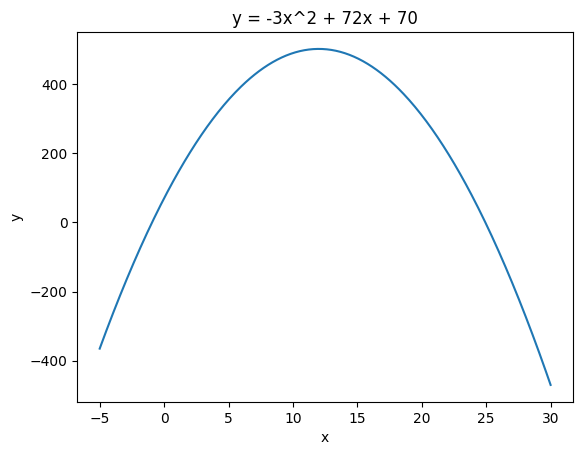

In [14]:
x = np.linspace(-5, 30, 400)
y = -3*x**2 + 72*x + 70

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("y = -3x^2 + 72x + 70")

## 2.3 Plot $f(x_1, x_2)$.

/opt/anaconda3/lib/python3.13/site-packages/mpl_toolkits/mplot3d/art3d.py:1403: RuntimeWarning: divide by zero encountered in matmul
  shade = ((normals / np.linalg.norm(normals, axis=1, keepdims=True))
/opt/anaconda3/lib/python3.13/site-packages/mpl_toolkits/mplot3d/art3d.py:1403: RuntimeWarning: overflow encountered in matmul
  shade = ((normals / np.linalg.norm(normals, axis=1, keepdims=True))


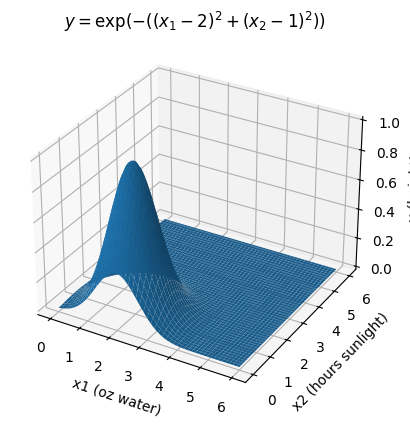

In [ ]:
x1 = np.linspace(0, 6, 200)
x2 = np.linspace(0, 6, 200)
X1, X2 = np.meshgrid(x1, x2)

Y = np.exp(-((X1 - 2)**2 + (X2 - 1)**2))

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X1, X2, Y)
ax.set_xlabel("x1 (oz water)")
ax.set_ylabel("x2 (hours sunlight)")
ax.set_zlabel("y (height)")
ax.set_title(r"$y=\exp(-((x_1-2)^2+(x_2-1)^2))$")

## 3.1(b) Draw from joint distribution of $(S, W)$ and generate bivariate histogram.

Empirical mean of S: 120.01055322576612
Empirical mean of W: 4.041579855230118


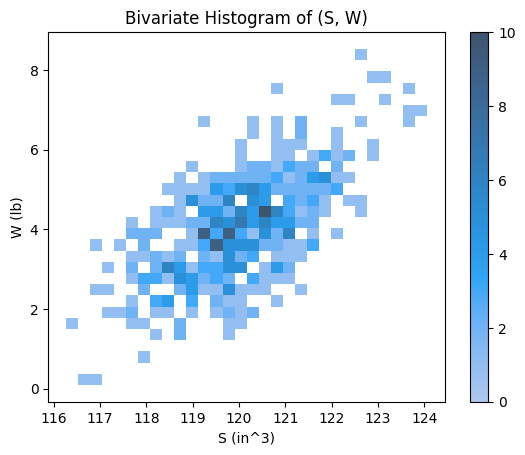

In [24]:
mu = np.array([120, 4])
Sigma = np.array([[1.5, 1], [1, 1.5]])

samples = mvn(mean=mu, cov=Sigma).rvs(size=500)

S = samples[:, 0]
W = samples[:, 1]

sns.histplot(x=S, y=W, bins=30, cbar=True)
plt.xlabel("S (in^3)")
plt.ylabel("W (lb)")
plt.title("Bivariate Histogram of (S, W)")

print("Empirical mean of S:", S.mean())
print("Empirical mean of W:", W.mean())

## 3.2 Plot the joint PDFs at $S=118$ and $S=122$, varying $W$.

Text(0.5, 1.0, 'Joint PDF slices at S = 118 and S = 122')

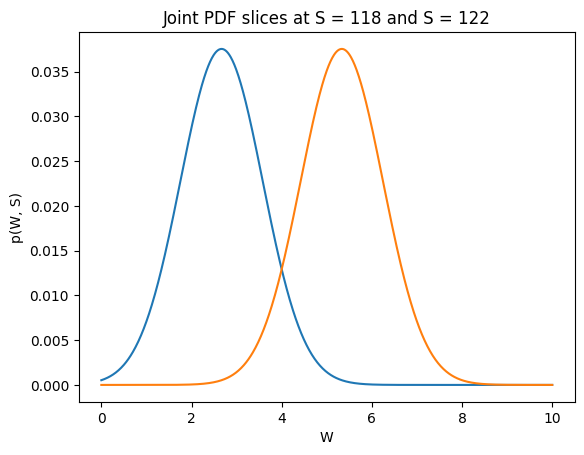

In [34]:
mu = np.array([120, 4])
Sigma = np.array([[1.5, 1], [1, 1.5]])

rv = mvn(mean=mu, cov=Sigma)

W_vals = np.linspace(0, 10, 1001)

S1 = 118
S2 = 122

points_S1 = np.column_stack((np.full_like(W_vals, S1), W_vals))
points_S2 = np.column_stack((np.full_like(W_vals, S2), W_vals))

pdf_S1 = rv.pdf(points_S1)
pdf_S2 = rv.pdf(points_S2)

plt.plot(W_vals, pdf_S1, label="S = 118")
plt.plot(W_vals, pdf_S2, label="S = 122")

plt.xlabel("W")
plt.ylabel("p(W, S)")
plt.title("Joint PDF slices at S = 118 and S = 122")

## 3.5(a) Function to simulate draws from $T^{*}$.

In [50]:

mu = np.array([120, 4])
Sigma = np.array([[1.5, 1], [1, 1.5]])

rv_SW = mvn(mean=mu, cov=Sigma)

def simulate_T_star():
    N = poisson(mu=3).rvs(size=24).sum()
    
    if N == 0:
        return 0.0
    
    samples = rv_SW.rvs(size=N)
    S = samples[:, 0]
    W = samples[:, 1]
    
    eps = norm(loc=0, scale=np.sqrt(5)).rvs(size=N)
    
    T = 60 + 0.6 * W + 0.2 * S + eps
    
    return T.sum()


## 3.5(b) Empirically estimate the mean and standard deviation of $T^{*}$ by generating $1000$ samples.

In [53]:
M = 1000
Tstar_samples = np.array([simulate_T_star() for _ in range(M)])

print("Empirical mean of T*:", Tstar_samples.mean())
print("Empirical std of T*:", Tstar_samples.std(ddof=1))

Empirical mean of T*: 6203.037291870622
Empirical std of T*: 761.9121823483968


# 4.1: Examining the Data

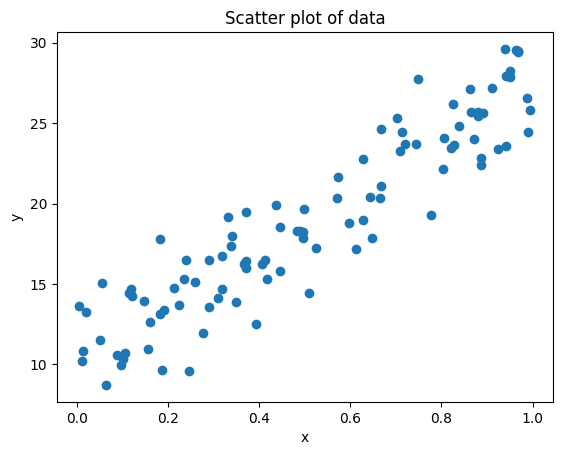

In [ ]:
# Steve's solution
data = pd.read_csv("data/points.csv").values
x = data[0]
y = data[1]

# Fix and plot

x = data[:, 0]
y = data[:, 1]

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot of data")

## 4.2: Adding the Intercept/Bias Term

In [58]:
# Steve's solution
intercept = np.ones(x.shape[0])
X = np.hstack([intercept, x]) # horizontally stack the ones and x coordinates next to each other

## 4.4: Implementing the LinearRegression Class

In [59]:
# Steve's solution
class LinearRegression:
    def __init__(self):
        self.w = None

    def fit(self, X, y):
        """
        Fit linear model to the data, estimating weights w.
        """
        return (X.T * X)**-1 * X * y.T

    def predict(X):
        """
        Use fitted weights to predict target y given input features X.
        """
        return X @ w

In [60]:
### DON'T MODIFY THIS CELL

# Fit the linear regression
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)
# Plot the data and the regression line
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred, color='red')
plt.title("Linear Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig('img_output/hw0_p4_4.png')
plt.show()

ValueError: operands could not be broadcast together with shapes (4,) (2,) 

## 4.5 MSE Computation

In [ ]:
# Steve's solution
mse = 0
for i in range(len(y)):
    mse = mse + (y[i] - y_pred[i])**2
mse = mse / len(y)
print(mse)